<a href="https://colab.research.google.com/github/dishitk/machine-learning/blob/master/Machine_Learning_Project_1_Pima_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
true_count = len(df.loc[df['Outcome'] == 1])
false_count = len(df.loc[df['Outcome'] == 0])
true_proportion = (true_count / (true_count + false_count)) * 100
false_proportion = (false_count / (true_count + false_count)) * 100
print('Number of true cases: {0} ({1:2.2f}%)'.format(true_count, true_proportion))
print('Number of false cases: {0} ({1:2.2f}%)'.format(false_count, false_proportion))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


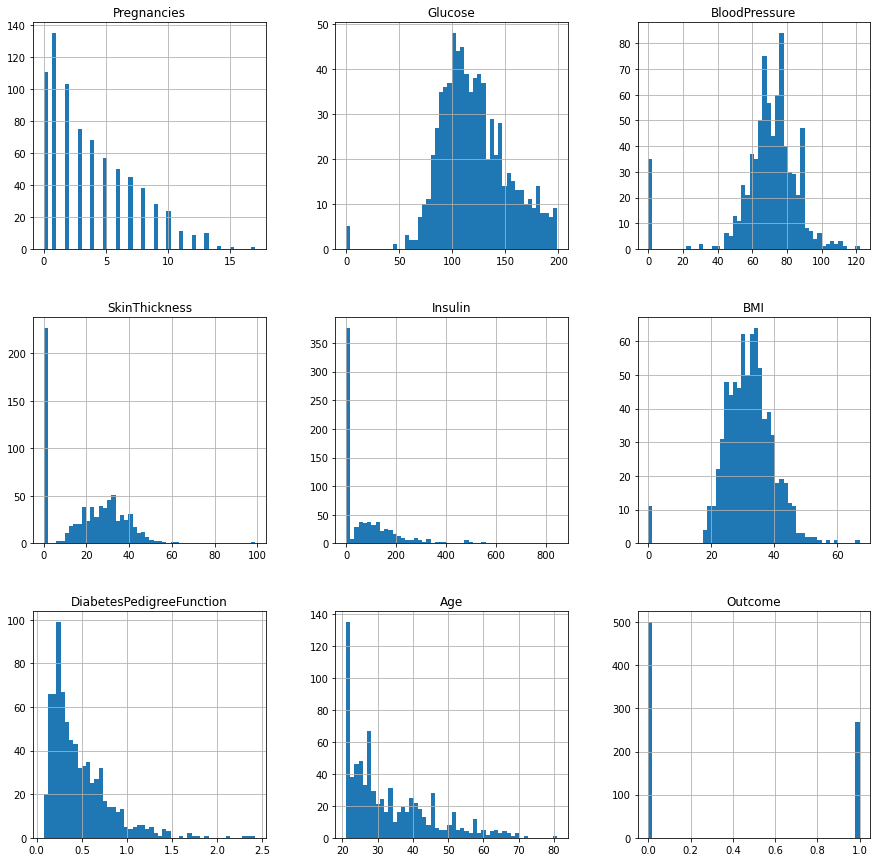

In [34]:
df.hist(bins=50, figsize=(15, 15))
plt.show() 

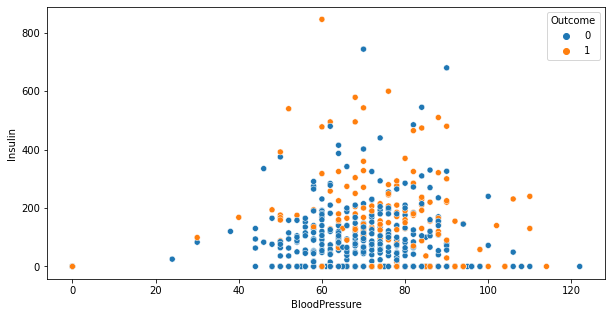

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="BloodPressure", y="Insulin",hue="Outcome")

In [36]:
X_diabetes = df.drop('Outcome',1).values
Y_diabetes = df['Outcome'].values
print(X_diabetes.shape)
print(Y_diabetes.shape)

(768, 8)
(768,)


In [37]:
from sklearn.model_selection import train_test_split
from operator import itemgetter, attrgetter

X_train, X_test, Y_train, Y_test = train_test_split(X_diabetes, Y_diabetes,test_size=0.1,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(691, 8)
(691,)
(77, 8)
(77,)


In [38]:
def euclidean_distance(data_1, data_2):
	distance = np.sum(np.square(np.subtract(data_1,data_2)))
	return np.sqrt(distance)
 
def manhattan_distance(data_1,data_2):
  return np.sum(np.subtract(data_1,data_2))
  
def chebyshev_distance(data_1,data_2):
  return np.max(np.absolute(np.subtract(data_1,data_2)))

In [45]:
def get_neighbors(train, test_data, neighbors_count,distance_metric):
  metric_distances = []
  for train_data_row_index in range(len(train)):
    if distance_metric == "c":
      distance = chebyshev_distance(test_data, train[train_data_row_index])
      metric_distances.append((train_data_row_index, distance))
    elif distance_metric == "m":
      distance = manhattan_distance(test_data, train[train_data_row_index])
      metric_distances.append((train_data_row_index, distance))
    else:
      distance = euclidean_distance(test_data, train[train_data_row_index])
      metric_distances.append((train_data_row_index, distance))
  metric_distances.sort(key=lambda d: d[1])
  neighbors = []
  for i in range(neighbors_count):
    neighbors.append(metric_distances[i][0]);
  return neighbors

In [40]:
def k_nearest_neighbors(train, test, num_neighbors,*args):
  neighbors = get_neighbors(train, test, num_neighbors, *args)
  output_values = [Y_train[row] for row in neighbors]
  prediction = max(set(output_values), key=output_values.count)
  return prediction

In [41]:
def accuracy_predictions(Y_hat, Y_test):
  prediction_true = 0
  for i in range(len(Y_hat)):
    if Y_hat[i]==Y_test[i]:
      prediction_true += 1
  return (prediction_true/len(Y_hat))*100

Model Accuracy with Chebyshev Distance Metric: 74.02597402597402
Wall Clock Runtime:  0.4391510486602783

Model Accuracy with Manhattan Distance Metric: 62.33766233766234
Wall Clock Runtime:  0.3300042152404785

Model Accuracy with Euclidean Distance Metric: 77.92207792207793
Wall Clock Runtime:  0.5287587642669678



Text(0.5, 15.0, 'Predicted label')

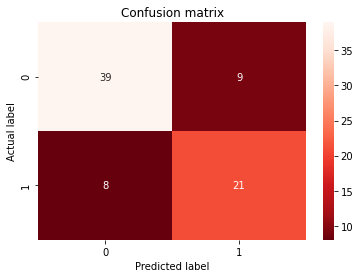

In [46]:
import time
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns

# Chebyshev Metric
start = time.time()
y_hat = []
for row in X_test:
  z = k_nearest_neighbors(X_train,row,3,'c')
  y_hat.append(z)

model_accuracy = accuracy_predictions(y_hat,Y_test)
end = time.time()
print("Model Accuracy with Chebyshev Distance Metric:", model_accuracy)
print(f"Wall Clock Runtime:  {end - start}\n")

# Manhattan Metric
start = time.time()
y_hat = []
for row in X_test:
  z = k_nearest_neighbors(X_train,row,3,'m')
  y_hat.append(z)

model_accuracy = accuracy_predictions(y_hat,Y_test)
end = time.time()
print("Model Accuracy with Manhattan Distance Metric:", model_accuracy)
print(f"Wall Clock Runtime:  {end - start}\n")


# Euclidean Metric
start = time.time()
y_hat = []
for row in X_test:
  z = k_nearest_neighbors(X_train,row,3,'e')
  y_hat.append(z)

model_accuracy = accuracy_predictions(y_hat,Y_test)
end = time.time()
print("Model Accuracy with Euclidean Distance Metric:", model_accuracy)
print(f"Wall Clock Runtime:  {end - start}\n")

total_confusion_matrix = confusion_matrix(Y_test, y_hat)
p = sns.heatmap(pd.DataFrame(total_confusion_matrix), annot=True, cmap="Reds_r" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
